In [1]:
# Package Loaded
import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
tf.set_random_seed(0)

In [2]:
n_dim = 2
n_class = 3
n_feature = 100
n_data = n_feature * n_class

In [4]:
X1 = np.random.randn(n_feature, n_dim) + np.array([0, 10])
X2 = np.random.randn(n_feature, n_dim) + np.array([5, 5])
X3 = np.random.randn(n_feature, n_dim) + np.array([10, 0])

Y1 = np.array([[1, 0, 0] for i in range(n_feature)])
Y2 = np.array([[0, 1, 0] for i in range(n_feature)])
Y3 = np.array([[0, 0, 1] for i in range(n_feature)])

X = np.concatenate((X1, X2, X3), axis = 0)
Y = np.concatenate((Y1, Y2, Y3), axis = 0)

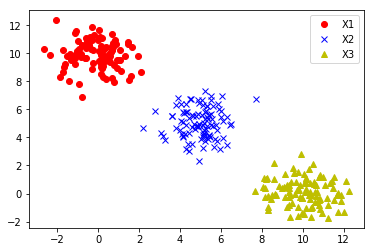

In [10]:
plt.plot(X1[:,0], X1[:,1], 'ro')
plt.plot(X2[:,0], X2[:,1], 'bx')
plt.plot(X3[:,0], X3[:,1], 'y^')
plt.legend(['X1', 'X2', 'X3'], loc=1)
plt.show()

In [5]:
w = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))

x = tf.placeholder(tf.float32, shape=[None, n_dim])
t = tf.placeholder(tf.float32, shape=[None, n_class])
y = tf.nn.softmax(tf.matmul(x, w) + b)

In [7]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(t*tf.log(y), reduction_indices=[1]))

In [11]:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

In [12]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(t, 1))

In [13]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [14]:
batch_size = 50
n_batchs = n_data // batch_size

for epoch in range(20):
    X_, Y_ = shuffle(X, Y)
    for i in range(n_batchs):
        start = i * batch_size
        end = start + batch_size
        
        sess.run(train_step, feed_dict={x:X_[start:end], t:Y_[start:end]})

In [15]:
X_, Y_ = shuffle(X, Y)
classified = correct_prediction.eval(session=sess, feed_dict={x:X_[0:10], t:Y_[0:10]})
prob = y.eval(session=sess, feed_dict={x:X_[0:10]})

print('classified : ')
print(classified)
print('\n-------------------------------------------------------\n')
print('probability : ')
print(prob)

classified : 
[ True  True  True  True  True  True  True  True  True  True]

-------------------------------------------------------

probability : 
[[7.0592627e-08 4.2801123e-02 9.5719880e-01]
 [9.9512768e-01 4.8722513e-03 9.4892305e-10]
 [1.2843535e-02 9.8611313e-01 1.0432965e-03]
 [3.1714906e-10 2.2009790e-03 9.9779898e-01]
 [9.8349702e-01 1.6503021e-02 3.6586599e-08]
 [9.3706340e-09 1.4945448e-02 9.8505449e-01]
 [4.8116393e-02 9.5112050e-01 7.6310511e-04]
 [3.9867674e-09 2.5456741e-03 9.9745435e-01]
 [9.9917489e-01 8.2511676e-04 5.2490307e-11]
 [7.8127068e-01 2.1872592e-01 3.3919857e-06]]


In [16]:
print("w : ", sess.run(w))
print("b : ", sess.run(b))

w :  [[-1.0941135   0.2873642   0.8067494 ]
 [ 0.7920673   0.29516825 -1.087236  ]]
b :  [-0.03990704  0.09363411 -0.05372709]
